In [127]:
# import necessary packages.
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd 

In [128]:
 #here, we set our dataset
Mydata= pd.read_csv('heart.csv')
Mydata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145,233.0,1,0,150,0.0,2.3,0,0.0,1,1.0
1,37.0,1.0,2.0,130,250.0,0,1,187,0.0,3.5,0,0.0,2,1.0
2,41.0,0.0,1.0,130,204.0,0,0,172,0.0,1.4,2,0.0,2,1.0
3,56.0,1.0,1.0,120,236.0,0,1,178,0.0,0.8,2,0.0,2,1.0
4,57.0,0.0,0.0,120,354.0,0,1,163,1.0,0.6,2,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140,241.0,0,1,123,1.0,0.2,1,0.0,3,0.0
299,45.0,1.0,3.0,110,264.0,0,1,132,0.0,1.2,1,0.0,3,0.0
300,68.0,1.0,0.0,144,193.0,1,1,141,0.0,3.4,1,2.0,3,0.0
301,57.0,1.0,0.0,130,131.0,0,1,115,1.0,1.2,1,1.0,3,0.0


In [129]:
# here, we declare cloumns types.
Mydata.dtypes


age         float64
sex         float64
cp          float64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang       float64
oldpeak     float64
slope         int64
ca          float64
thal          int64
target      float64
dtype: object

In [130]:
Mydata.size

4242

In [131]:
Mydata["target"].value_counts()

1.0    165
0.0    137
Name: target, dtype: int64

In [132]:
Mydata.isnull().sum()

age         1
sex         1
cp          3
trestbps    0
chol        1
fbs         0
restecg     0
thalach     0
exang       1
oldpeak     0
slope       0
ca          1
thal        0
target      1
dtype: int64

In [133]:
Mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.350993,9.093241,29.0,47.25,55.0,61.00,77.0
sex,302.0,0.685430,0.465115,0.0,0.00,1.0,1.00,1.0
cp,300.0,0.976667,1.032639,0.0,0.00,1.0,2.00,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.377483,51.879075,126.0,211.00,240.5,274.75,564.0
fbs,303.0,0.148515,0.356198,0.0,0.00,0.0,0.00,1.0
restecg,303.0,0.528053,0.525860,0.0,0.00,1.0,1.00,2.0
thalach,303.0,149.646865,22.905161,71.0,133.50,153.0,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.00,0.8,1.60,6.2


In [134]:
heart_dataset = Mydata.copy(deep = True)

heart_dataset[['age','sex','cp','chol', 'exang', 'ca', 'target']] = heart_dataset[['age','sex','cp','chol', 'exang', 'ca', 'target']].replace(0,np.NaN)

## showing the count of Nans
print(heart_dataset.isnull().sum())

age           1
sex          96
cp          143
trestbps      0
chol          1
fbs           0
restecg       0
thalach       0
exang       204
oldpeak       0
slope         0
ca          175
thal          0
target      138
dtype: int64


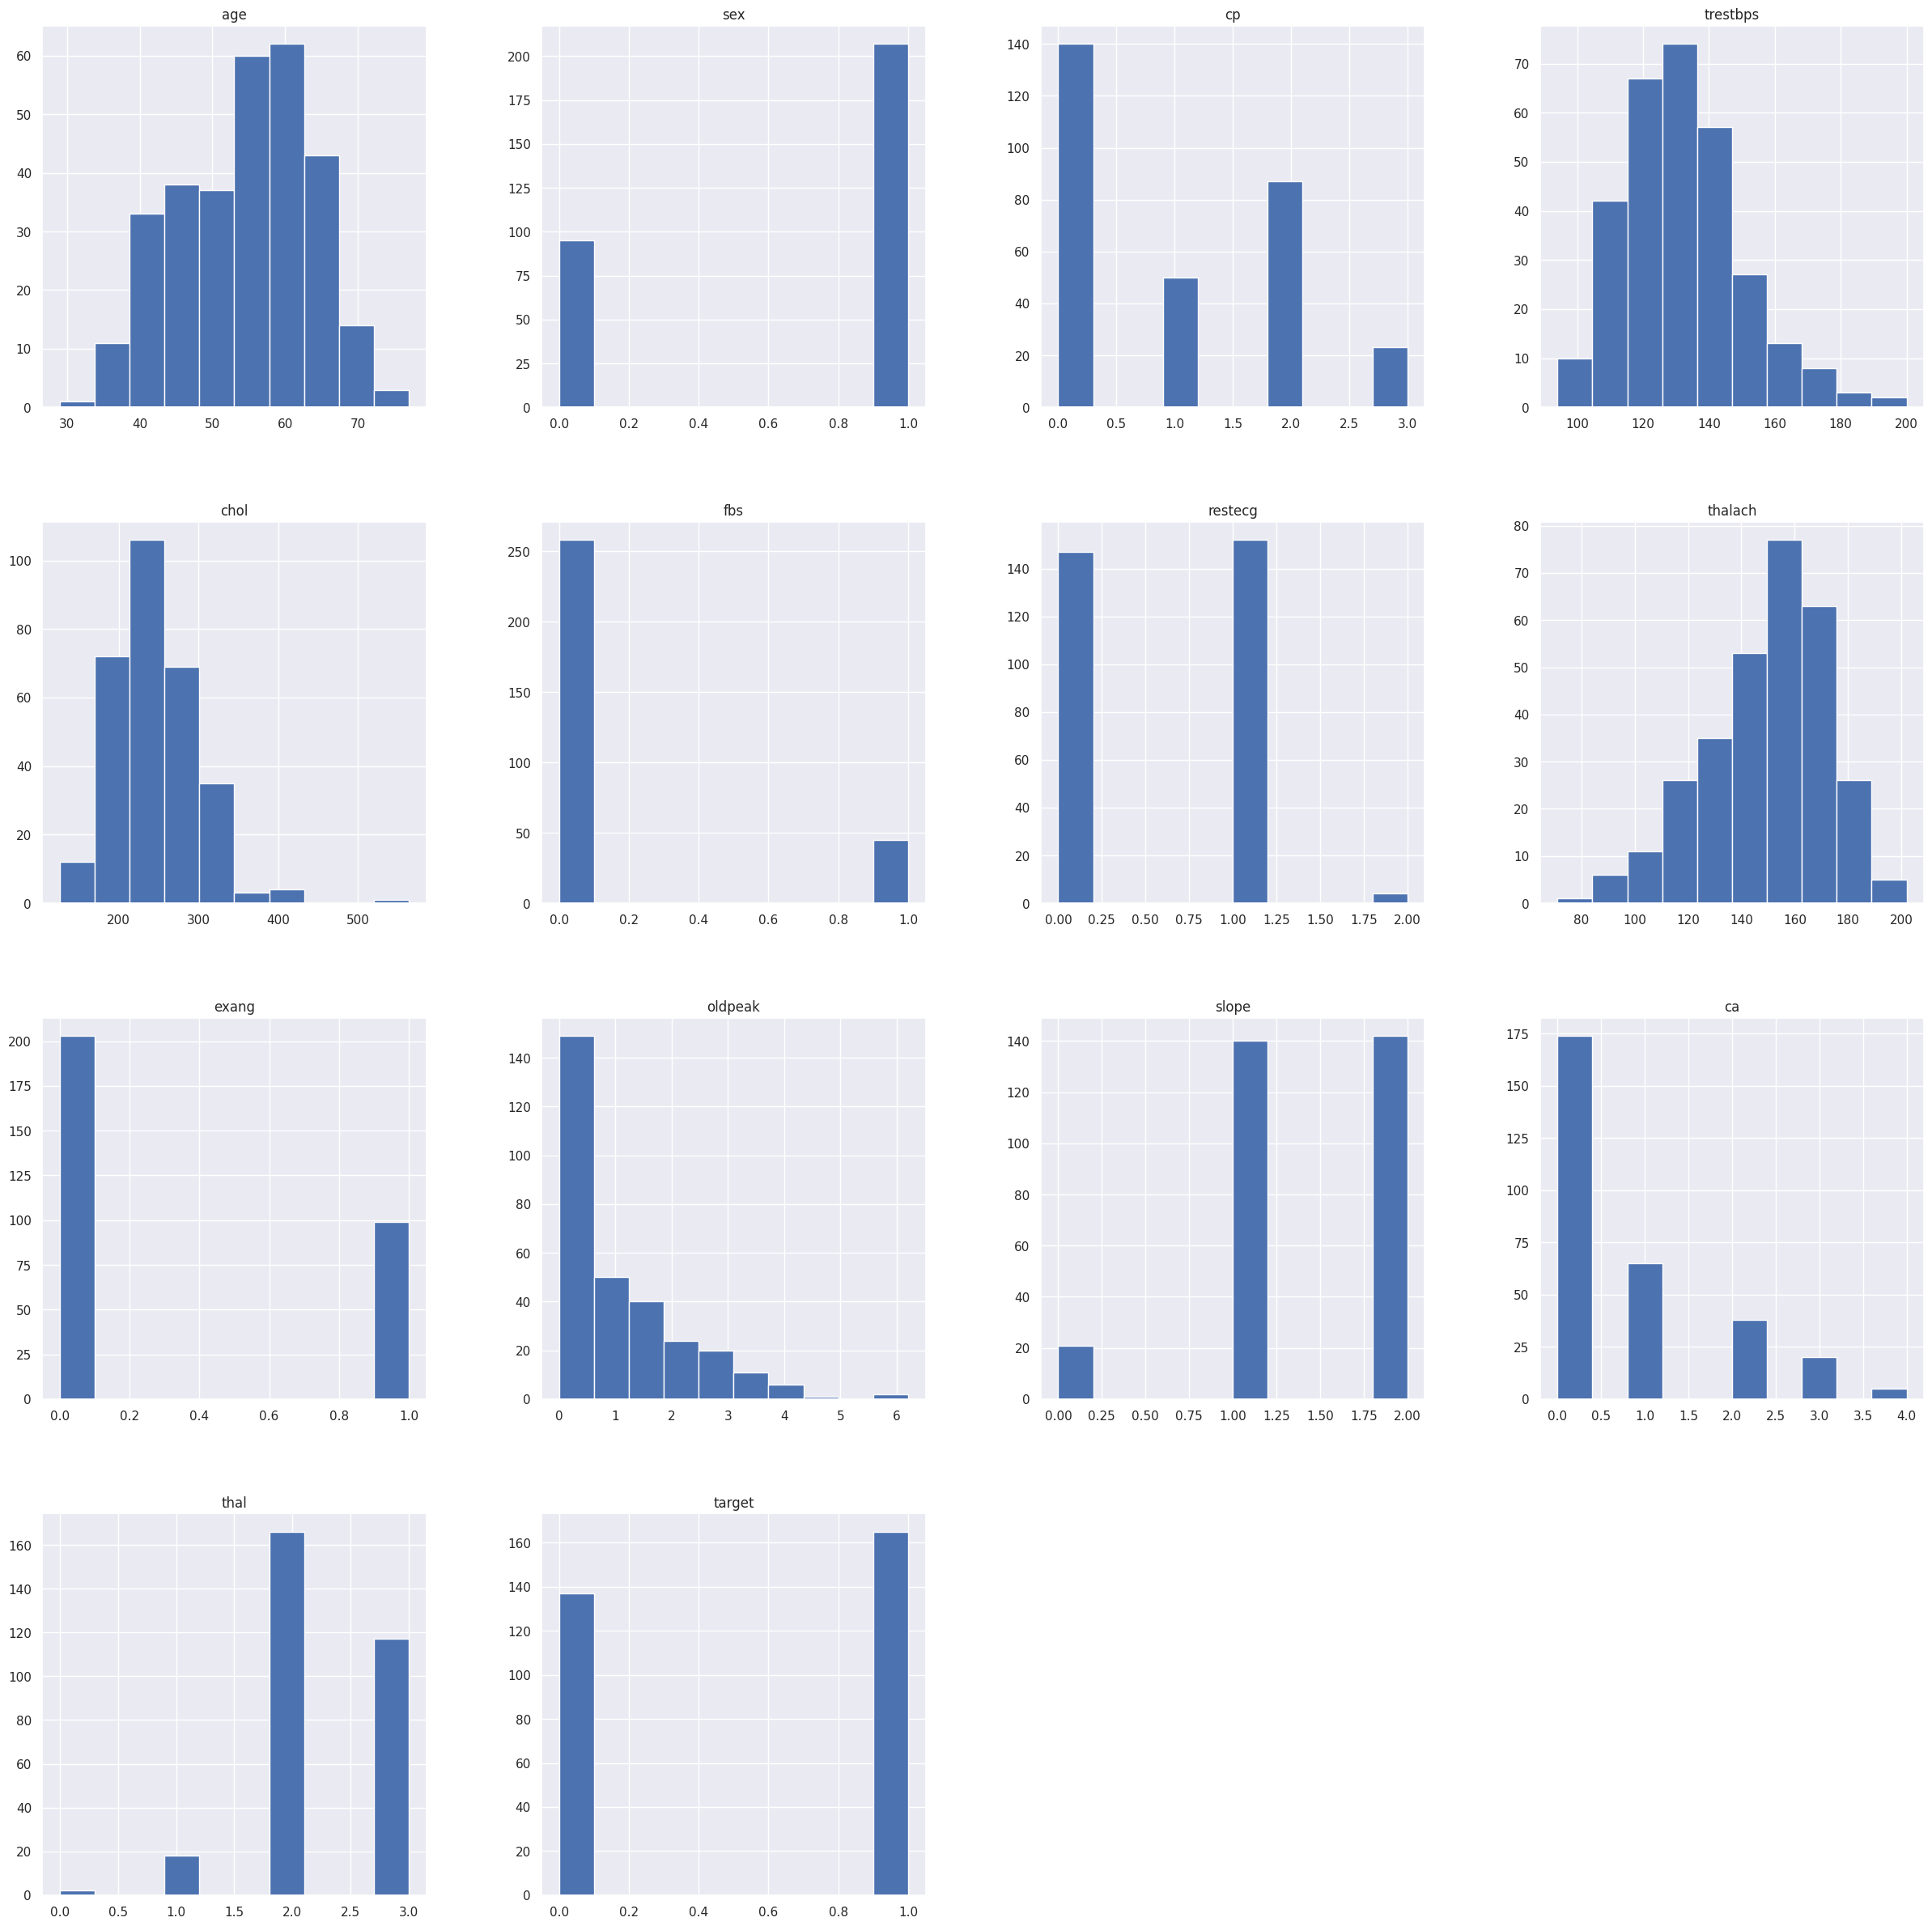

In [135]:
p = Mydata.hist(figsize = (30,30))


In [136]:
from sklearn.model_selection import train_test_split #training and testing data split

X=Mydata[['age','sex','cp','chol', 'exang', 'ca']]
y=Mydata["target"]

train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=0)

train_X,val_X,train_Y,val_Y=train_test_split(train_X,train_Y,test_size=0.3,random_state=0)

len(train_X), len(train_Y), len(test_X), len(test_Y)

(148, 148, 91, 91)

In [137]:
train_X.fillna(0)

,age,sex,cp,chol,exang,ca
205,52.0,1.0,0.0,255.0,1.0,1.0
95,53.0,1.0,0.0,226.0,1.0,0.0
120,64.0,0.0,0.0,303.0,0.0,2.0
176,60.0,1.0,0.0,230.0,1.0,2.0
60,71.0,0.0,2.0,265.0,0.0,1.0
...,...,...,...,...,...,...
268,54.0,1.0,0.0,286.0,1.0,2.0
165,67.0,1.0,0.0,286.0,1.0,3.0
48,53.0,0.0,2.0,216.0,0.0,0.0
295,63.0,1.0,0.0,187.0,1.0,2.0


In [138]:
train_Y.fillna(0)


205    0.0
95     1.0
120    1.0
176    0.0
60     1.0
      ... 
268    0.0
165    0.0
48     1.0
295    0.0
163    1.0
Name: target, Length: 148, dtype: float64

In [139]:
train_X.head()

,age,sex,cp,chol,exang,ca
205,52.0,1.0,0.0,255.0,1.0,1.0
95,53.0,1.0,0.0,226.0,1.0,0.0
120,64.0,0.0,0.0,303.0,0.0,2.0
176,60.0,1.0,0.0,230.0,1.0,2.0
60,71.0,0.0,2.0,265.0,0.0,1.0


In [140]:
#the train data 
train_Y.head()

205    0.0
95     1.0
120    1.0
176    0.0
60     1.0
Name: target, dtype: float64

In [141]:
test_Y.head()

225    0.0
152    1.0
228    0.0
201    0.0
52     1.0
Name: target, dtype: float64

In [142]:
test_X.head()


,age,sex,cp,chol,exang,ca
225,70.0,1.0,0.0,174.0,1.0,0.0
152,64.0,1.0,3.0,227.0,0.0,0.0
228,59.0,1.0,3.0,288.0,0.0,0.0
201,60.0,1.0,0.0,258.0,1.0,1.0
52,62.0,1.0,2.0,231.0,0.0,3.0


In [143]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()

train_Y=train_Y.fillna(0)
train_X=train_X.fillna(0)
test_X=test_X.fillna(0)
test_Y=test_Y.fillna(0)

dt=dt.fit(train_X,train_Y)


In [144]:
heart_dataset.isnull().sum()

age           1
sex          96
cp          143
trestbps      0
chol          1
fbs           0
restecg       0
thalach       0
exang       204
oldpeak       0
slope         0
ca          175
thal          0
target      138
dtype: int64

In [145]:
# also, here we use mean method as another solution to handle null values.
heart_dataset['age'].fillna(heart_dataset['age'].mean(), inplace = True) 
heart_dataset['sex'].fillna(heart_dataset['sex'].mean(), inplace = True) 
heart_dataset['cp'].fillna(heart_dataset['cp'].mean(), inplace = True) 
heart_dataset['chol'].fillna(heart_dataset['chol'].mean(), inplace = True)
heart_dataset['exang'].fillna(heart_dataset['exang'].mean(), inplace = True)
heart_dataset['ca'].fillna(heart_dataset['ca'].mean(), inplace = True)
heart_dataset['target'].fillna(heart_dataset['target'].mean(), inplace = True)

In [146]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [147]:
#accuracy
# Predicting results using testing  data set
## dt.score(test_X,train_Y)

pred = dt.predict(test_X)

# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(pred,test_Y)

0.7252747252747253

In [148]:
#accuracy
# Predicting results using training data set
pred = dt.predict(train_X)
accuracy_score(pred,train_Y)

1.0

Text(0.5, 19.049999999999997, 'Predicted label')

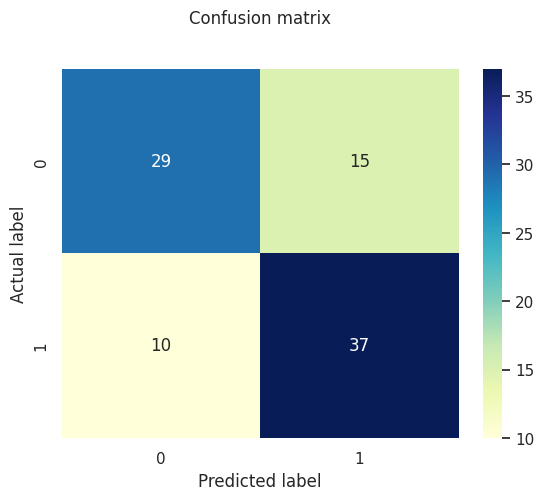

In [149]:
# confusion_matrix
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("\n")
y_pred = dt.predict(test_X)

cnf_matrix = metrics.confusion_matrix(test_Y, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
def model_evaluation(test_Y, y_pred, model_name):
    acc = accuracy_score(test_Y, y_pred)
    prec = precision_score(test_Y, y_pred)
    rec = recall_score(test_Y, y_pred)
    f1 = f1_score(test_Y, y_pred)
    f2 = fbeta_score(test_Y, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

print("\n")

model_evaluation(test_Y, y_pred, "DecisionTree")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,DecisionTree,0.725275,0.711538,0.787234,0.747475,0.770833


In [151]:
from sklearn.metrics import classification_report

val_accuracy = accuracy_score(test_Y, y_pred)
print("\n")
print(f'Accuracy Validation for the Decision Tree is: {val_accuracy}')
print("\n")
target_names = ['no 0', 'yes 1']
print(classification_report(test_Y, y_pred, target_names=target_names))
print("\n")



Accuracy Validation for the Decision Tree is: 0.7252747252747253


              precision    recall  f1-score   support

        no 0       0.74      0.66      0.70        44
       yes 1       0.71      0.79      0.75        47

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91





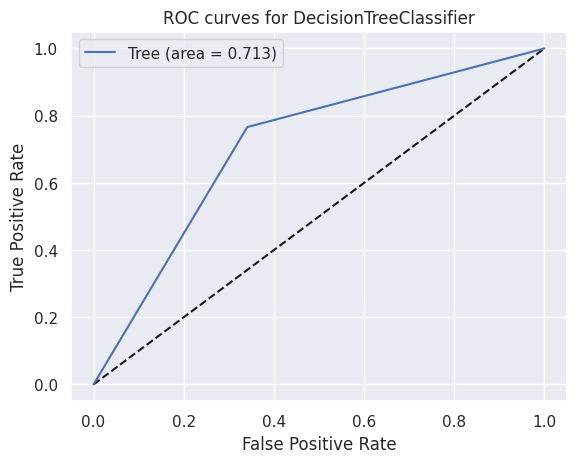

In [152]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve

# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

print("\n")

plt.plot([0, 1], [0, 1], 'k--')
 
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for DecisionTreeClassifier')
plt.legend(loc='best')
plt.show()
print("\n")

# KNN implementation 

In [153]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(train_X,train_Y)
    train_scores.append(knn.score(train_X,train_Y))
    test_scores.append(knn.score(train_X,train_Y))

In [154]:
##accuracy
# Predicting results using testing  data set
pred = knn.predict(test_X)
accuracy_score(pred,test_Y)

0.6373626373626373

In [155]:
# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(train_X,train_Y)
    
    test_score = knn.score(test_X, test_Y)
    train_score = knn.score(train_X, train_Y)
    
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc , columns=['K','Accuracy Test Score','Accuracy Train Score'])
print("\n")
print(df)
print("\n")



     K  Accuracy Test Score  Accuracy Train Score
0    1             0.615385              1.000000
1    2             0.615385              0.756757
2    3             0.593407              0.770270
3    4             0.615385              0.709459
4    5             0.637363              0.702703
5    6             0.593407              0.662162
6    7             0.626374              0.702703
7    8             0.648352              0.655405
8    9             0.659341              0.668919
9   10             0.659341              0.621622
10  11             0.659341              0.655405
11  12             0.626374              0.614865
12  13             0.648352              0.594595
13  14             0.637363              0.527027
14  15             0.604396              0.554054
15  16             0.637363              0.560811




In [156]:
## score that comes from testing  
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 100.0 % and k = [1]


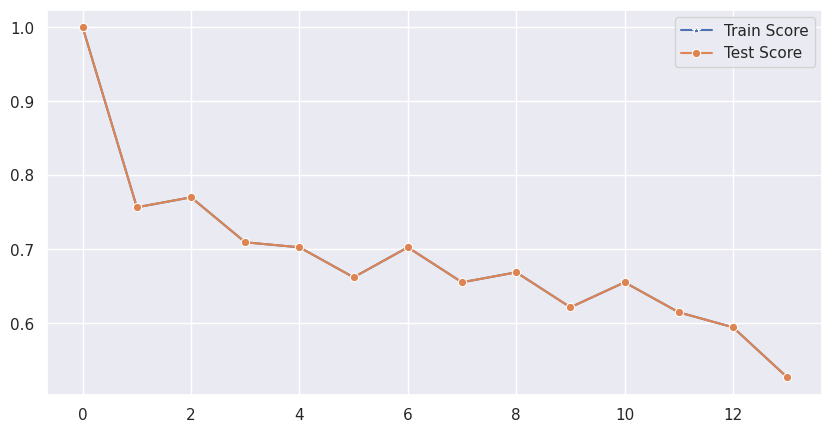

In [157]:
##Visualizing KNN
plt.figure(figsize=(10,5))
p = sns.lineplot( train_scores,marker='*',label='Train Score')
p = sns.lineplot( test_scores,marker='o',label='Test Score')

Text(0.5, 19.049999999999997, 'Predicted label')

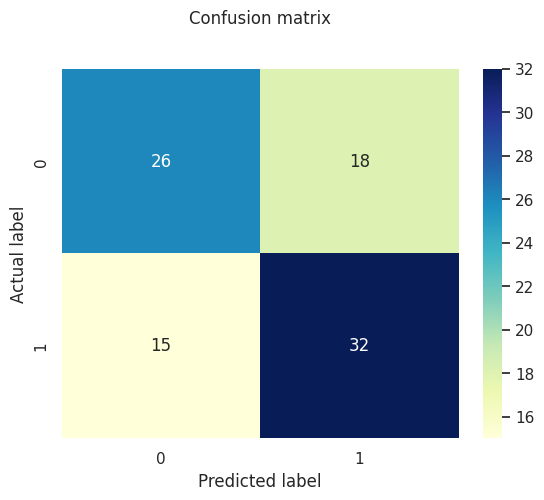

In [158]:
#  confusion_matrix
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("\n")
y_pred = knn.predict(test_X)
cnf_matrix = metrics.confusion_matrix(test_Y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
def model_evaluation(test_Y, y_pred, model_name):
    acc = accuracy_score(test_Y, y_pred)
    prec = precision_score(test_Y, y_pred)
    rec = recall_score(test_Y, y_pred)
    f1 = f1_score(test_Y, y_pred)
    f2 = fbeta_score(test_Y, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results


print("\n")
model_evaluation(test_Y, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.637363,0.64,0.680851,0.659794,0.672269


In [160]:
from sklearn.metrics import classification_report
val_accuracy = accuracy_score(test_Y, y_pred)
print("\n")
print(f'Accuracy Validation for the KNN is: {val_accuracy}')
print("\n")
target_names = ['no 0', 'yes 1']
print(classification_report(test_Y, y_pred, target_names=target_names))



Accuracy Validation for the KNN is: 0.6373626373626373


              precision    recall  f1-score   support

        no 0       0.63      0.59      0.61        44
       yes 1       0.64      0.68      0.66        47

    accuracy                           0.64        91
   macro avg       0.64      0.64      0.64        91
weighted avg       0.64      0.64      0.64        91



In [161]:
knn_5 = KNeighborsClassifier(n_neighbors=7)

# fit the model to the training set
knn_5.fit(train_X,train_Y)

# predict on the test-set
y_pred_5 = knn_5.predict(test_X)

print('Model accuracy score with k=7: {0:0.4f}'. format(accuracy_score(test_Y, y_pred_5)))

Model accuracy score with k=7: 0.6264


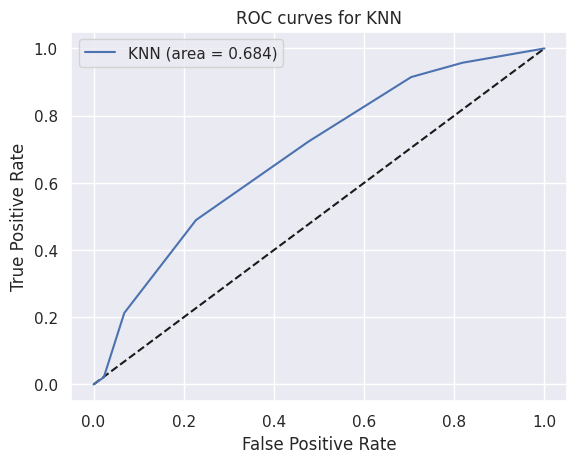

In [162]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve

# Decision Tree
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(train_X,train_Y)

y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)

print("\n")
plt.plot([0, 1], [0, 1], 'k--')
 
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for KNN')
plt.legend(loc='best')
plt.show()